## Importing libraries

In [ ]:
#Operational System
import os

#Math libs
import numpy as np
import pandas as pd

#Graphs libs
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Machine Learning algorithms
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Classification
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


Creating functions that allow us to authenticate on Kaggle and download the dataset through API. Further more, it creates a JSON assigning the user and authentication token and prepares the retrieved dataframe.

In [ ]:
def createJson():

  import json
  import shutil
  import os.path

  if os.path.exists('./kaggle') == True:
    shutil.rmtree('./kaggle')

  os.makedirs('./kaggle', exist_ok=True)

  credentials = {"username": "caiodultra","key":"5aacc781e4a4931ba98cfe7b572a870b"}

  with open('./sample_data/kaggle.json', 'w') as file:
    json.dump(credentials, file)


  !cp /content/sample_data/kaggle.json ~/.kaggle/kaggle.json
  !kaggle config set -n path -v /content/downloads/
  !kaggle datasets download -d fedesoriano/heart-failure-prediction

def unzipDataset():

  from zipfile import ZipFile

  with ZipFile('/content/downloads/datasets/fedesoriano/heart-failure-prediction/heart-failure-prediction.zip', 'r') as zip_ref:
      zf = zip_ref.extractall('/content/downloads/datasets/fedesoriano/heart-failure-prediction/')
      df = pd.read_csv('/content/downloads/datasets/fedesoriano/heart-failure-prediction/heart.csv')

  return df

In [ ]:
# Create Json file with API Kaggle token
createJson()

- path is now set to: /content/downloads/
  0% 0.00/8.56k [00:00<?, ?B/s]
100% 8.56k/8.56k [00:00<00:00, 6.27MB/s]


In [ ]:
# Unzip downloaded dataset
unzipDataset()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
rev_df = unzipDataset()

# Analysing the dataframe variables

Obs: Looking up every single variable and its patterns.

## Data - Age

In [ ]:
rev_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
rev_df.shape

(918, 12)

### Some observations:



1.   The highest incidence of heart failure occurs in the ages between 50 and 60 years old.
2.   The attribute 'nbins' mins how large the graph plotted columns are going to be.
3.   The function 'histogram' only exists on plotly.express package and not plotly only.
4.   Using Seaborn (sns) is possible to see the trend through the ages. Ages in seventies are less damaged by heart failure. Interesting...





In [ ]:
hist1 = px.histogram (rev_df, x = 'Age', nbins=60)
hist1.update_layout(width=800, height=500, title_text = 'Distribuição das idades')
hist1.show()

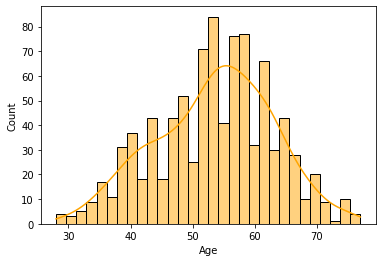

In [ ]:
sns.histplot(rev_df, x='Age', bins=30, color='orange', kde=True, stat='count')

## Data - Sex (Gender)

Some observations:


1.   About gender we've only two classes. That's why we're goint to plot a 'bars graph' instead of using another one (histogram for example).
2.   Clearly man are more affected by heart failure than women.
3.   If we had the same number of men and women, would the result be the same?



In [ ]:
rev_df['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

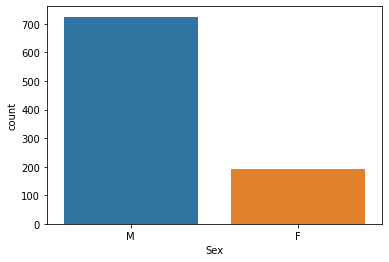

In [ ]:
sns.countplot(x='Sex', data=rev_df);

## Data - Chest Pain Type



1.   ASY - Asymptomatic
2.   NAP - Not Anginous Pain
3.   ATA - Atypical Angina
4.   TA - Typical Angina


Angina: Pain chest caused by the decreasing of blood flow in heart.



In [ ]:
rev_df['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

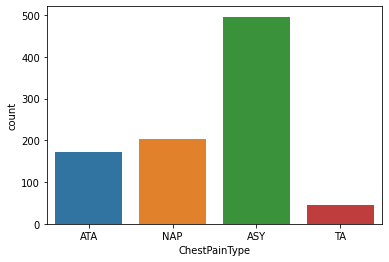

In [ ]:
sns.countplot(x='ChestPainType', data=rev_df);

## Data - Rest BP (Blood Pressure - mmHg systolic) 

Some observations:

1.   There's a 'Rest BP' with the value 0 in the result below. It needs to be fixed.



In [ ]:
rev_df['RestingBP'].value_counts().sort_index()

0       1
80      1
92      1
94      2
95      6
       ..
180    12
185     1
190     2
192     1
200     4
Name: RestingBP, Length: 67, dtype: int64

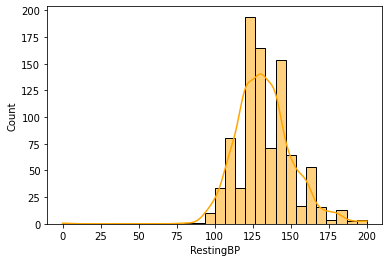

In [ ]:
sns.histplot(rev_df, x='RestingBP', bins=30, color='orange', kde=True, stat='count');

## Data - Cholesterol

Some observations:

1.   There's a 'Cholesterol' with the value 0 in the result below as well. It also needs to be fixed.


In [ ]:
rev_df['Cholesterol'].value_counts().sort_index()

0      172
85       1
100      2
110      1
113      1
      ... 
491      1
518      1
529      1
564      1
603      1
Name: Cholesterol, Length: 222, dtype: int64

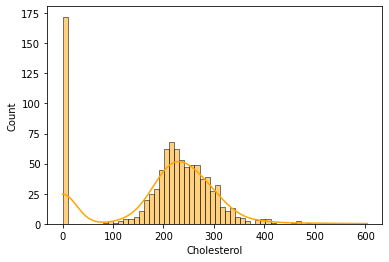

In [ ]:
sns.histplot(rev_df, x='Cholesterol', color='orange', stat='count', bins=60, kde = True);

In [ ]:
listResult = list(filter(lambda x: x==0, rev_df['Cholesterol'])).count(0)
print('Total of zero cholesterol values is', listResult)

Total of zero cholesterol values is 172


## Data - Fasting BS (blood sugar)

Some observations:

1.   0 - Fasting BS less than 120 mg/dl is a ***NON DIABETIC***
2.   1 - Fasting BS greater or equal to 120 mg/dl is ***DIABETIC***



In [ ]:
rev_df['FastingBS'].value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

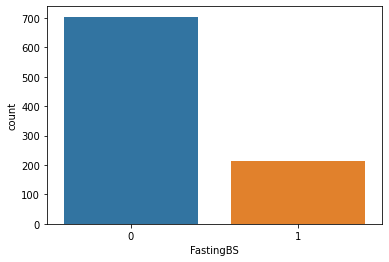

In [ ]:
sns.countplot(x = 'FastingBS', data = rev_df);

## Resting ECG - Resting Electrocardiogram

Some observations:


1.   Normal: Normal
2.   LVH: Left Ventricular Hypertrophy
3.   ST: ST-T Wave abnormality



> LVH: https://www.heart.org/en/health-topics/heart-valve-problems-and-disease/heart-valve-problems-and-causes/what-is-left-ventricular-hypertrophy-lvh#:~:text=Left%20ventricular%20hypertrophy%2C%20or%20LVH,pressure%20overwork%20the%20heart%20muscle.


> ST: https://ecg.utah.edu/lesson/10




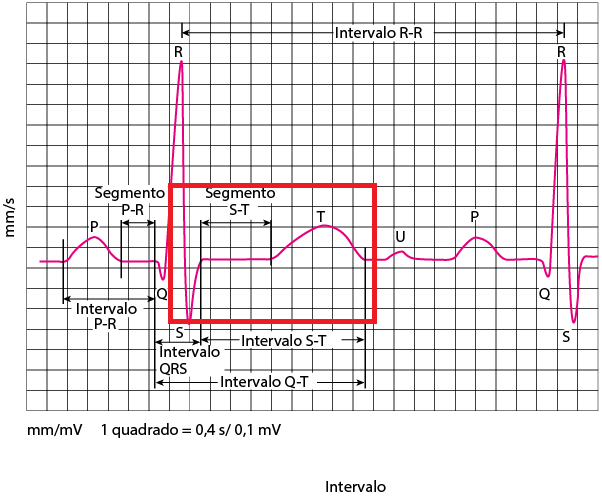

ST Segment: Any ST-segment gap, up (above-level) or down (under-level), should be evaluated as it may correspond to an acute myocardial infarction.

In [ ]:
rev_df['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

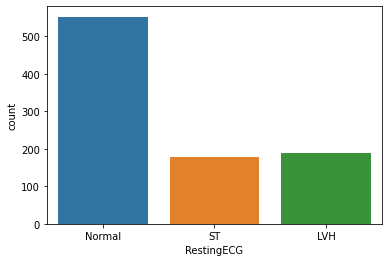

In [ ]:
sns.countplot(x = 'RestingECG', data = rev_df);

Data - Max HR (Heart Rate)

In [ ]:
rev_df['MaxHR'].value_counts().sort_index()

60     1
63     1
67     1
69     1
70     1
      ..
190    2
192    1
194    1
195    1
202    1
Name: MaxHR, Length: 119, dtype: int64

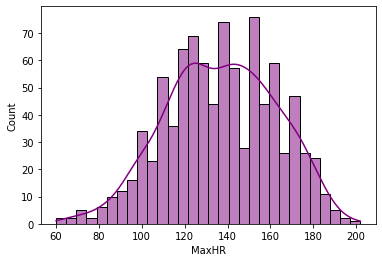

In [ ]:
sns.histplot(rev_df, x='MaxHR', bins=30, color='purple', kde=True, stat = 'count');

## Data - Exercise Agina

Some observations:


*   Chest pain caused by physical exercises



In [ ]:
rev_df['ExerciseAngina'].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [ ]:
px.pie(rev_df, 'ExerciseAngina', title = 'Exercise Angina', width=500, height=400, color_discrete_sequence=px.colors.sequential.PuBu_r)

## Data - Old Peak (ST-Segment depression) referenced in ECG induced by exercise related to rest

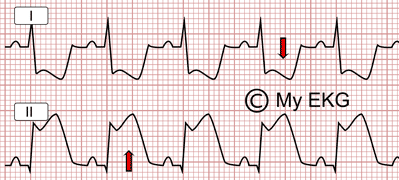

In [ ]:
rev_df['Oldpeak'].value_counts()

 0.0    368
 1.0     86
 2.0     76
 1.5     53
 3.0     28
 1.2     26
 0.2     22
 0.5     19
 1.4     18
 1.8     17
 2.5     16
 0.8     16
 1.6     16
 0.1     14
 0.6     14
 0.4     11
 0.3     11
 4.0      8
 0.7      7
 2.8      7
 1.9      7
 1.3      7
 2.6      7
 1.1      7
 1.7      6
 2.2      5
 0.9      4
 2.4      4
 3.6      4
 3.4      3
 4.2      2
 3.5      2
-0.5      2
 2.3      2
 3.2      2
 2.1      2
-1.0      2
-0.1      2
 5.6      1
 2.9      1
 6.2      1
 3.8      1
-1.5      1
 3.1      1
-2.0      1
 3.7      1
-0.8      1
-0.7      1
-1.1      1
-2.6      1
-0.9      1
 5.0      1
 4.4      1
Name: Oldpeak, dtype: int64

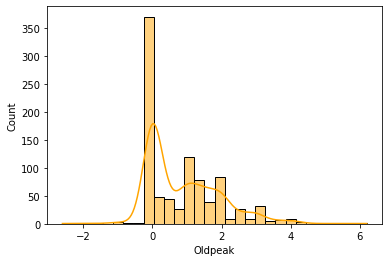

In [ ]:
sns.histplot(rev_df, x='Oldpeak', bins=30, color='orange', kde = True, stat = 'count');

## Data - ST Slope (ECG)

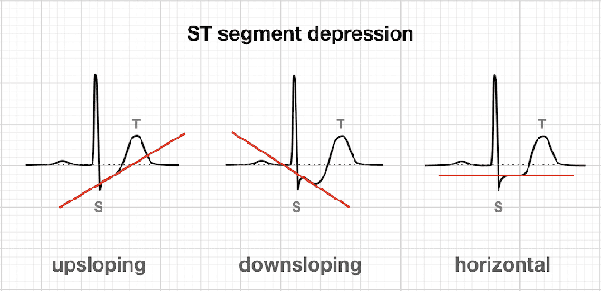




In [ ]:
rev_df['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [ ]:
px.pie(rev_df, 'ST_Slope', width=500, height=400, color_discrete_sequence=px.colors.sequential.Sunsetdark, title='ST Slope')

## Data - Heart Disease

This is going to be our target

*   0 - Usually indicates a non heart disease
*   1 - Usualy indicates a heart disease









In [ ]:
rev_df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [ ]:
px.pie(rev_df, 'HeartDisease', width=500, height=400, color_discrete_sequence=px.colors.sequential.PuBu_r)

## Analysing the attribute types, Descriptive Statistics Analysis and looking up for missing values

In [ ]:
rev_df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [ ]:
rev_df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

## Descriptive Statistics Analysis

In [ ]:
rev_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
rev_df.mode()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,54,M,ASY,120,0,0,Normal,150,N,0.0,Flat,1


## Working on Inconsistent Values

Note that here we're taking out zero values from column 'RestingBP' and also saving it on a brand new dataframe.

In [ ]:
df = rev_df.loc[rev_df['RestingBP'] != 0]
df.shape

(917, 12)

Note that the 'min' of 'RestingBP' now is 80.00. Differente from 00.00 in the above describe line.

In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,199.016358,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,109.246330,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,174.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Changing Cholesterol zero values for their mean

In [ ]:
df['Cholesterol'].value_counts()

0      171
254     11
223     10
220     10
230      9
      ... 
392      1
316      1
153      1
466      1
131      1
Name: Cholesterol, Length: 222, dtype: int64

In [ ]:
df['Cholesterol'].mean()

199.0163576881134

In [ ]:
df['Cholesterol'].replace(0, np.NaN, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df.isnull().sum()

Age                 0
Sex                 0
ChestPainType       0
RestingBP           0
Cholesterol       171
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
dtype: int64

In [ ]:
df['Cholesterol'].mean()

244.6353887399464

In [ ]:
df['Cholesterol'].fillna(df['Cholesterol'].mean(), inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
df.mode()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,54,M,ASY,120,244.635389,0,Normal,150,N,0.0,Flat,1


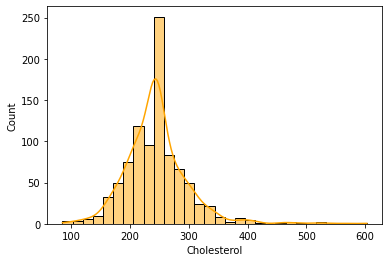

In [ ]:
sns.histplot(df,x = 'Cholesterol', bins = 30,color = 'orange', kde=True, stat='count');

## Analysing outliers

Outliers - Values that differs significantly from the others observed.

Resting BP - Encountered Outliers

*   Min = 80
*   Max = 200




In [ ]:
px.box(df, y='RestingBP')

Cholesterol - Encountered Outliers

*   Min = 85
*   Max = 603


In [ ]:
px.box(df, y='Cholesterol')

Max HR - Encountered Outliers

*   Min = 60, 63

In [ ]:
px.box(df, y='MaxHR')

## Pre-processing

Variable subtitle


*   var forecasters = var df with 'LabelEncoder' applied
*   var sec_forecasters = var forecasters with 'OneHotEncoder' applied

*   third_forecasters = var sec_forecasters turned into a dataframe
*   third_forecasters = var third_forecasters with 'StandardScaler' applied











Turning nominal categorical variables into orginal categorical variables with ***sklearn.preprocessing - LabelEncoder***

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0


In [ ]:
forecasters = df.iloc[:, 0:11].values #Defining the forecaster variables
target = df.iloc[:, 11].values #Defining the 'target' variable

Applying LabelEncoder to all nominal categorical columns

In [ ]:
list_for = [1, 2, 6, 8, 10]

for i in list_for:
  forecasters[:, i] = LabelEncoder().fit_transform(forecasters[:, i])

forecasters

array([[40, 1, 1, ..., 0, 0.0, 2],
       [49, 0, 2, ..., 0, 1.0, 1],
       [37, 1, 1, ..., 0, 0.0, 2],
       ...,
       [57, 1, 0, ..., 1, 1.2, 1],
       [57, 0, 1, ..., 0, 0.0, 1],
       [38, 1, 2, ..., 0, 0.0, 2]], dtype=object)

'OneHotEncoding' all the columns in order to create dummy variables

In [ ]:
#transformers receives: Name, Function and List of columns to be used
#remainder receives 'passthrough' to ignore not used data or 'drop' to delete them all (not used)

sec_forecasters = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), list_for)], remainder='passthrough').fit_transform(forecasters)
sec_forecasters

array([[0.0, 1.0, 0.0, ..., 0, 172, 0.0],
       [1.0, 0.0, 0.0, ..., 0, 156, 1.0],
       [0.0, 1.0, 0.0, ..., 0, 98, 0.0],
       ...,
       [0.0, 1.0, 1.0, ..., 0, 115, 1.2],
       [1.0, 0.0, 0.0, ..., 0, 174, 0.0],
       [0.0, 1.0, 0.0, ..., 0, 173, 0.0]], dtype=object)

In [ ]:
third_forecaster = pd.DataFrame(sec_forecasters)
third_forecaster.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,40,140,289.0,0,172,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,49,160,180.0,0,156,1.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,37,130,283.0,0,98,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,48,138,214.0,0,108,1.5
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,54,150,195.0,0,122,0.0


In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0


Applying 'StandardScaler' to normalize our forecasting features which means that our 'mean' should be close enough to 0 and 'standard deviation' equal or lesser than 1.

In [ ]:
third_forecaster_esc = StandardScaler().fit_transform(third_forecaster)
third_forecaster_esc

array([[-0.51630861,  0.51630861, -1.08542493, ..., -0.55173333,
         1.38333943, -0.83150225],
       [ 1.9368261 , -1.9368261 , -1.08542493, ..., -0.55173333,
         0.75473573,  0.10625149],
       [-0.51630861,  0.51630861, -1.08542493, ..., -0.55173333,
        -1.52395266, -0.83150225],
       ...,
       [-0.51630861,  0.51630861,  0.92129817, ..., -0.55173333,
        -0.85606123,  0.29380223],
       [ 1.9368261 , -1.9368261 , -1.08542493, ..., -0.55173333,
         1.46191489, -0.83150225],
       [-0.51630861,  0.51630861, -1.08542493, ..., -0.55173333,
         1.42262716, -0.83150225]])

## Train and Test Split

Some observations:


*   arrays: Name of forcasters and target attribute

*   test_size: Size in percentual for testing data (default is 'none')
*   train_size: Size in percentual for training data (default is 'none')


*   random_state: Nomination of a random state

*   shuffle: Shuffle of random data (default is 'true')





In [ ]:
#Forecasters

third_forecaster_esc

array([[-0.51630861,  0.51630861, -1.08542493, ..., -0.55173333,
         1.38333943, -0.83150225],
       [ 1.9368261 , -1.9368261 , -1.08542493, ..., -0.55173333,
         0.75473573,  0.10625149],
       [-0.51630861,  0.51630861, -1.08542493, ..., -0.55173333,
        -1.52395266, -0.83150225],
       ...,
       [-0.51630861,  0.51630861,  0.92129817, ..., -0.55173333,
        -0.85606123,  0.29380223],
       [ 1.9368261 , -1.9368261 , -1.08542493, ..., -0.55173333,
         1.46191489, -0.83150225],
       [-0.51630861,  0.51630861, -1.08542493, ..., -0.55173333,
         1.42262716, -0.83150225]])

In [ ]:
#Target - Heart Disease

target

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(third_forecaster_esc, target, test_size=0.3, random_state=0)

## Testing some Classification Algorithms

### Applying Naive Bayes

Accuracy using Naive Bayes: 86%

Analysing test data

In [ ]:
naive = GaussianNB()
naive.fit(x_train, y_train)

GaussianNB()

In [ ]:
predict_naive = naive.predict(x_test)
predict_naive

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [ ]:
#Getting accuracy form test target data and the prediction done by Naive
score = accuracy_score(y_test, predict_naive);
print('Accuracy: %.2f%%' % (score*100.0))

Accuracy: 84.78%


In [ ]:
#Getting confusion matrix

confusion_matrix(y_test, predict_naive)

array([[100,  21],
       [ 21, 134]])

In [ ]:
#Classification report

print(classification_report(y_test, predict_naive))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       121
           1       0.86      0.86      0.86       155

    accuracy                           0.85       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.85      0.85      0.85       276



Analysing training data

In [ ]:
train_predict_naive = naive.predict(x_train);
train_score = accuracy_score(y_train, train_predict_naive)

In [ ]:
print('Accuracy: %2.f%%' % (train_score *100.0))

Accuracy: 86%


In [ ]:
confusion_matrix(y_train, train_predict_naive)

array([[248,  41],
       [ 48, 304]])

Cross validation using KFold

In [ ]:
#Dividing data in folds

kfold = KFold(n_splits = 30, shuffle = True, random_state = 5)

#Creating the model

model = GaussianNB()
result = cross_val_score(model, third_forecaster_esc, target, cv = kfold)

In [ ]:
#Using the mean and standard deviation
print('Mean accuracy: %.2f%%' % (result.mean()*100.0))

Mean accuracy: 85.17%


### Applying SVM - Support Vector Machine

Accuracy using Support Vector Machine: 86.23%

In [ ]:
svm = SVC (kernel = 'rbf', random_state=1, C=2)
svm.fit(x_train, y_train)

SVC(C=2, random_state=1)

In [ ]:
predictions_svm = svm.predict(x_test)
predictions_svm;

In [ ]:
y_test;

In [ ]:
print("Accuracy for testing: %.2f%%" % (accuracy_score(y_test, predictions_svm)*100.0))

Accuracy for testing: 86.23%


In [ ]:
predictions_svm_train = svm.predict(x_train)
predictions_svm_train;

Evaluating if there's an overfiting or not

In [ ]:
print("Accuracy for training: %.2f%%" % (accuracy_score(y_train,predictions_svm_train)*100.0))

Accuracy for training: 92.82%


Confusion Matrix for testing data

In [ ]:
confusion_matrix(y_test, predictions_svm)

array([[ 99,  22],
       [ 16, 139]])

Confusion Matrix for training data

In [ ]:
confusion_matrix(y_train, predictions_svm_train)

array([[257,  32],
       [ 14, 338]])

Cross validation using KFold

In [ ]:
#Dividing data in folds

kfold = KFold(n_splits = 30, shuffle = True, random_state = 5)

#Creating the model

model_svc = SVC()

result_svc = cross_val_score(model_svc, third_forecaster_esc, target, cv = kfold)

In [ ]:
result_svc

array([0.96774194, 0.77419355, 0.83870968, 0.87096774, 0.83870968,
       0.90322581, 0.67741935, 0.90322581, 0.80645161, 0.80645161,
       0.87096774, 0.80645161, 0.96774194, 0.90322581, 0.83870968,
       0.83870968, 0.80645161, 0.93333333, 0.9       , 0.96666667,
       0.86666667, 0.86666667, 0.86666667, 0.66666667, 0.86666667,
       0.93333333, 0.83333333, 0.83333333, 0.9       , 0.86666667])

In [ ]:
#Using the mean and standard deviation
print('Mean accuracy: %.2f%%' % (result_svc.mean()*100.0))

Mean accuracy: 85.73%


In [ ]:
print(classification_report(y_test, predictions_svm))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       121
           1       0.86      0.90      0.88       155

    accuracy                           0.86       276
   macro avg       0.86      0.86      0.86       276
weighted avg       0.86      0.86      0.86       276

